In [17]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime as dt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('ggplot')

In [21]:
data = pd.read_csv('C:\\Users\\asedov001\\Documents\\CMF\\CIAN\\CianFlats_All_Fin.csv')

In [48]:
#data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop_duplicates(inplace=True)

In [50]:
data['Price per space'] = data['Price']/data['Total Space']

In [55]:
data.head()

,Lon,Lat,Rooms,Price,Total Space,Living Space,Kitchen Space,City center distance,Metro distance,Walk,Telephone,Balcon,Floor,Floor Number,Market Type,Price per space
0,37.588224,55.777130,4.0,185254500.0,250.0,195.0,17.0,3.269154,6.0,1.0,0.0,0.0,2.0,15.0,0.0,741018.000000
1,37.573267,55.725564,5.0,216130250.0,271.0,128.0,60.0,4.275971,5.0,1.0,0.0,0.0,11.0,14.0,0.0,797528.597786
2,37.591512,55.753068,2.0,25000000.0,53.0,35.0,9.0,1.772410,10.0,1.0,1.0,0.0,6.0,24.0,0.0,471698.113208
3,37.208255,55.626553,1.0,2316750.0,30.0,15.0,8.0,29.416088,0.0,0.0,1.0,0.0,2.0,4.0,0.0,77225.000000
4,37.964026,55.762920,2.0,3650000.0,73.0,36.0,11.0,21.560915,0.0,0.0,1.0,0.0,2.0,19.0,0.0,50000.000000


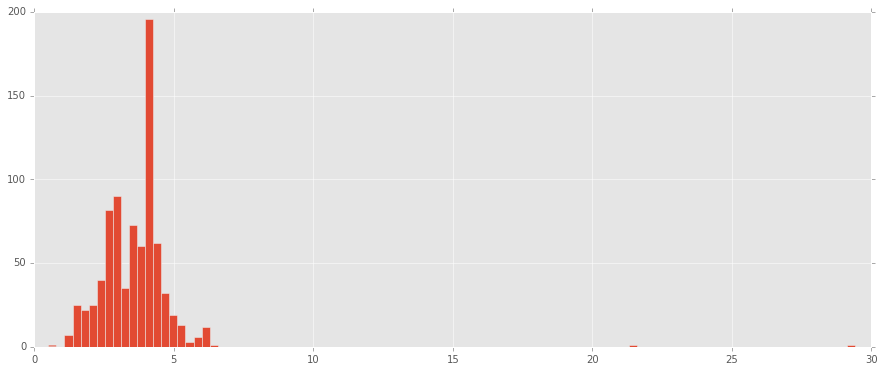

In [56]:
data['City center distance'].hist(bins=100)

In [57]:
data['Price'].max()

504502362.0

In [58]:
data['Price'].min()

2316750.0

In [60]:
data['Price'].mean()

23241921.570719603

In [61]:
data['Price'].median()

13284600.0

In [64]:
data['Total Space'].mean()

58.96277915632754

In [65]:
data['Total Space'].median()

48.0

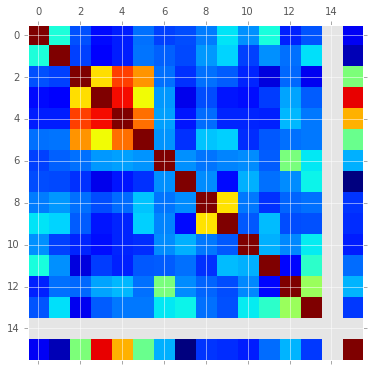

In [95]:
plt.matshow(data.corr())
plt.show()

In [79]:
rooms = [1,2,3,4,5]
means = []
d1 = data[data['Rooms']==1]
means.append(d1['Price'].mean())

d2 = data[data['Rooms']==2]
means.append(d2['Price'].mean())

d3 = data[data['Rooms']==3]
means.append(d3['Price'].mean())

d4 = data[data['Rooms']==4]
means.append(d4['Price'].mean())

d5 = data[data['Rooms']==5]
means.append(d5['Price'].mean())

means


[11614746.855855856,
 14350312.640522875,
 30117440.605042018,
 118664961.6,
 176858906.5]

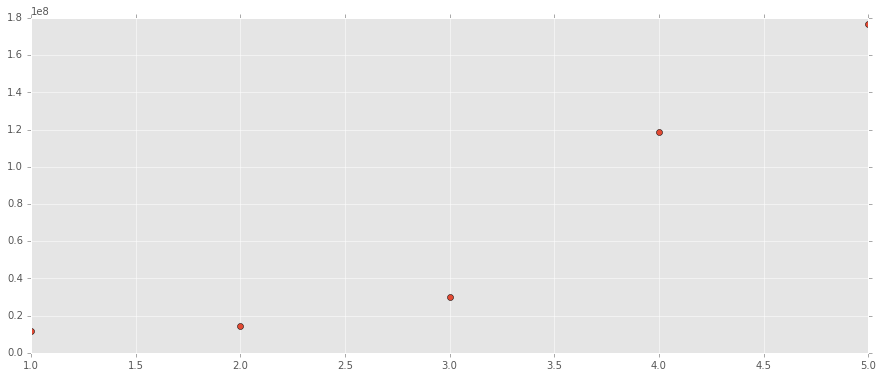

In [81]:
plt.plot(rooms, means, 'o')

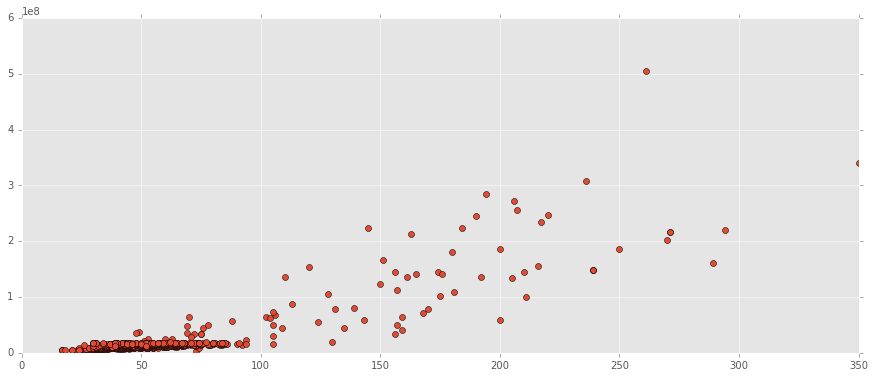

In [82]:
plt.plot(data['Total Space'], data['Price'], 'o')

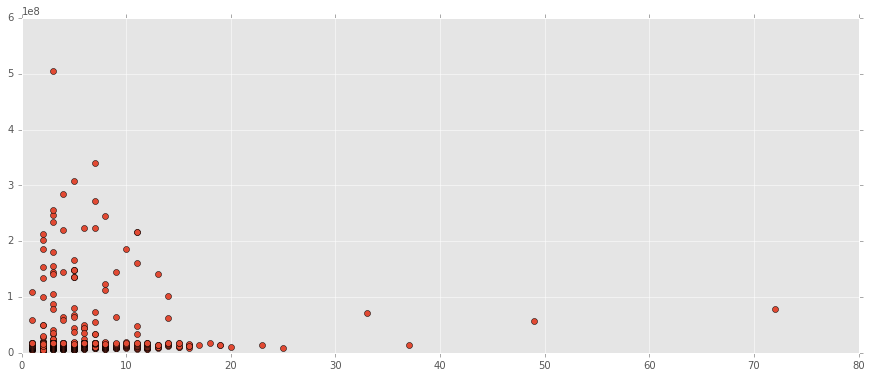

In [83]:
plt.plot(data['Floor'], data['Price'], 'o')

In [84]:
floor = pd.get_dummies(data['Floor'])
floors = pd.get_dummies(data['Floor Number'])

In [179]:
Y = data['Price']
df = data.drop(['Price', 'Floor', 'Floor Number', 'Lon', 'Lat'], inplace=False, axis=1)

In [180]:
X = pd.concat([df, floor, floors], axis=1)

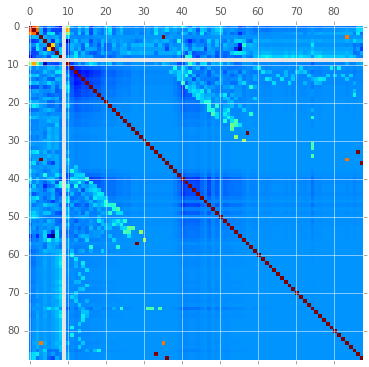

In [181]:
plt.matshow(X.corr())
plt.show()

In [182]:
X.head()

,Rooms,Total Space,Living Space,Kitchen Space,City center distance,Metro distance,Walk,Telephone,Balcon,Market Type,...,50.0,51.0,53.0,56.0,59.0,60.0,61.0,77.0,82.0,101.0
0,4.0,250.0,195.0,17.0,3.269154,6.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,271.0,128.0,60.0,4.275971,5.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,53.0,35.0,9.0,1.772410,10.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,30.0,15.0,8.0,29.416088,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,73.0,36.0,11.0,21.560915,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
# Linear Regression
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

X_lin = X[['Rooms', 'Total Space', 'Living Space', 'Walk']].fillna(0)
X_lin = preprocessing.scale(X_lin)
Y = Y.fillna(0)
num_folds = 10
num_instances = len(X)
seed = 7
num_trees = 20
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = LinearRegression()
results = cross_validation.cross_val_score(model, X_lin, Y, cv=kfold, scoring='neg_mean_squared_error')
print(-results.mean())

4.50228247887e+14


In [184]:
# Lasso Regression
from sklearn import cross_validation
from sklearn.linear_model import Lasso
from sklearn import preprocessing

X_lasso = preprocessing.scale(X.fillna(0))
Y = Y.fillna(0)
num_folds = 10
num_instances = len(X)
seed = 7
num_trees = 20
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = Lasso(alpha=0.0001, max_iter=10000)
results = cross_validation.cross_val_score(model, X_lasso, Y, cv=kfold, scoring='neg_mean_squared_error')
print(-results.mean())

C:\Users\asedov001\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\asedov001\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\asedov001\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\asedov001\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\

1.39265766553e+14


C:\Users\asedov001\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [185]:
# Ridge Regression
from sklearn import cross_validation
from sklearn.linear_model import Ridge
from sklearn import preprocessing

X_ridge = preprocessing.scale(X.fillna(0))
Y = Y.fillna(0)
num_folds = 10
num_instances = len(X)
seed = 7
num_trees = 20
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = Ridge()
results = cross_validation.cross_val_score(model, X_ridge, Y, cv=kfold, scoring='neg_mean_squared_error')
print(-results.mean())

1.37974523921e+14


In [186]:
# Random Forest Regression
from sklearn import cross_validation
from sklearn.ensemble import RandomForestRegressor as RFR

X_rfr =  preprocessing.scale(X.fillna(0))
Y = Y.fillna(0)
num_folds = 10
num_instances = len(X)
seed = 7
num_trees = 20
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = RFR()
results = cross_validation.cross_val_score(model, X_rfr, Y, cv=kfold, scoring='neg_mean_squared_error')
print(-results.mean())

1.43281694478e+14
